# Airline Passenger Web App Training

## Context: 
US Airline Passeneger Satisfaction survey 

## Data Attribute Information:

"Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)"

Age: The actual age of the passengers

Gender: Gender of the passengers (Female, Male)

"Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)"

"Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)"

Customer Type: The customer type (Loyal customer, disloyal customer)

Flight distance: The flight distance of this journey

"Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)"

Ease of Online booking: Satisfaction level of online booking

Inflight service: Satisfaction level of inflight service

Online boarding: Satisfaction level of online boarding

Inflight entertainment: Satisfaction level of inflight entertainment

Food and drink: Satisfaction level of Food and drink

Seat comfort: Satisfaction level of Seat comfort

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Baggage handling: Satisfaction level of baggage handling

Gate location: Satisfaction level of Gate location

Cleanliness: Satisfaction level of Cleanliness

Check-in service: Satisfaction level of Check-in service

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Flight cancelled: Whether the Flight cancelled or not (Yes, No)

Flight time in minutes: Minutes of Flight takes

In [183]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
# data source
airline = pd.read_excel("Data/satisfaction_2015.xlsx")
df = airline.copy()

## Quick Exploratory Data Analysis (EDA)

In [185]:
# data frame shape
df.shape

(129880, 24)

In [186]:
# data frame info on data types other column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [187]:
# check for null values
df.isna().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [188]:
# drop the null values at the row level
df.dropna(axis = 0, inplace = True)

In [189]:
# check if the null values were dropped
df.isna().sum().sum()

0

In [190]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,129487.0,64958.335169,37489.781165,1.0,32494.5,64972.0,97415.5,129880.0
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1190.210662,997.560954,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129487.0,2.728544,1.329235,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129487.0,3.057349,1.526787,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129487.0,2.756786,1.401662,0.0,2.0,3.0,4.0,5.0
Gate location,129487.0,2.976909,1.278506,0.0,2.0,3.0,4.0,5.0
Food and drink,129487.0,3.204685,1.329905,0.0,2.0,3.0,4.0,5.0
Online boarding,129487.0,3.252720,1.350651,0.0,2.0,3.0,4.0,5.0
Seat comfort,129487.0,3.441589,1.319168,0.0,2.0,4.0,5.0,5.0


In [191]:
# drop the id column since it adds no value for our model training
df.drop(['id'], axis = 1, inplace = True)

In [192]:
# first 5 observations
df.head()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,0,...,3,3,1,5,3,3,4,3,0,0.0
1,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,1,...,3,2,1,1,4,4,3,2,0,0.0
2,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,0,...,3,3,3,5,3,2,3,3,0,0.0
3,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,0,...,4,4,5,4,5,5,5,4,0,0.0
4,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,0,...,3,3,3,4,5,3,4,3,0,0.0


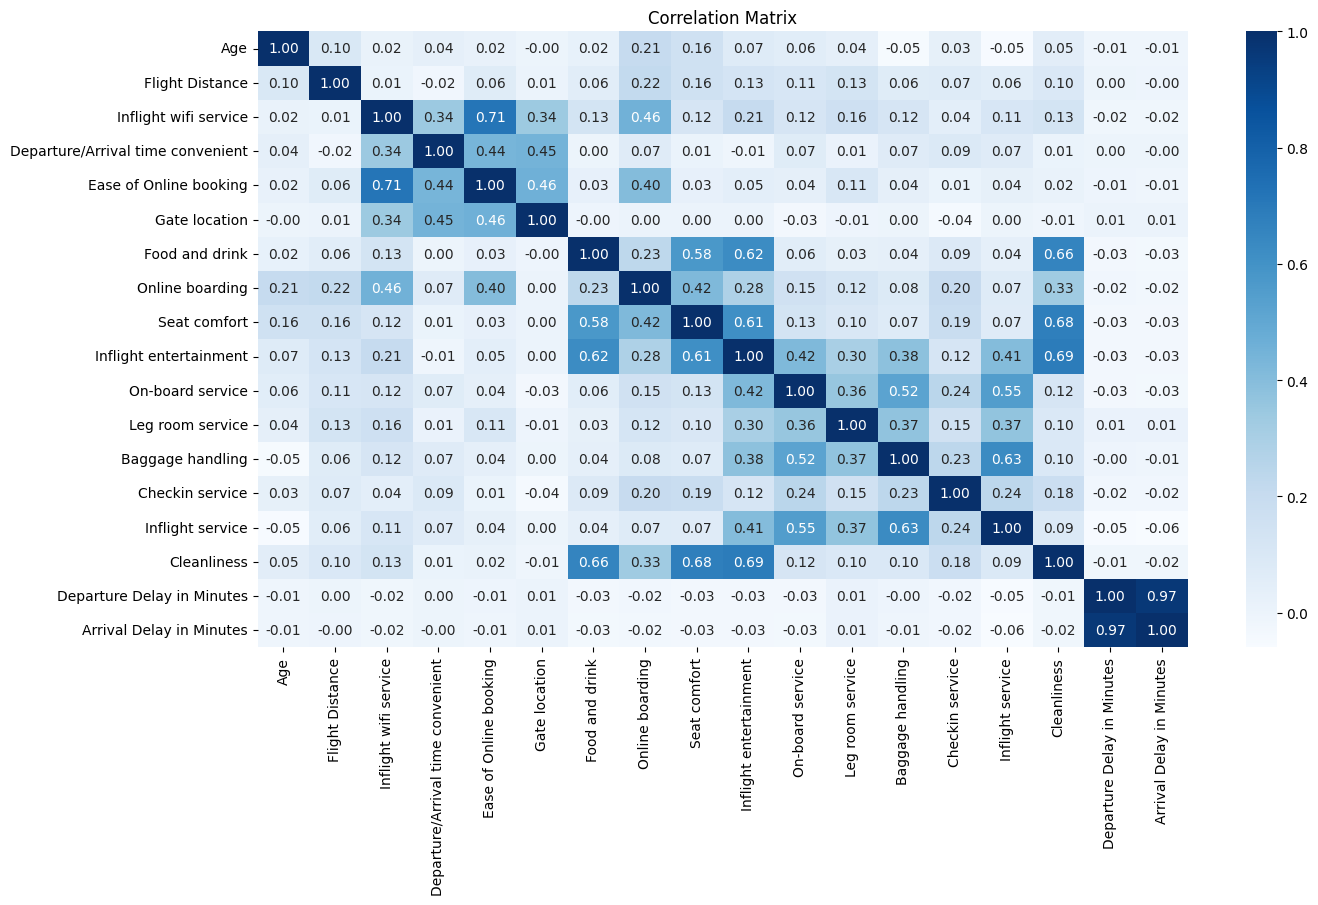

In [193]:
# correlation matrix
corr = df.corr(numeric_only = True)
plt.figure(figsize=(15,8))
plt.title("Correlation Matrix")
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "Blues")
plt.show()

In [194]:
airline["Type of Travel"].replace(["Business travel"], "Business Travel", inplace = True)
df["Type of Travel"].replace(["Business travel"], "Business Travel", inplace = True)

airline["Customer Type"].replace(["disloyal Customer"], "Disloyal Customer", inplace = True)
df["Customer Type"].replace(["disloyal Customer"], "Disloyal Customer", inplace = True)

In [195]:
df["Type of Travel"].unique()

array(['Personal Travel', 'Business Travel'], dtype=object)

## Visualizations

In [196]:
# list our colum names in our data frame
df.columns

Index(['satisfaction_v2', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

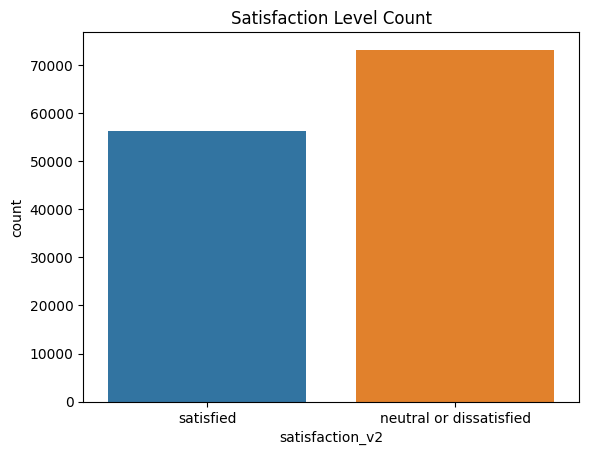

In [197]:
# count plot of classes in Online Boarding ratings 
sns.countplot(x = "satisfaction_v2", data = df)
plt.title("Satisfaction Level Count")
plt.show()

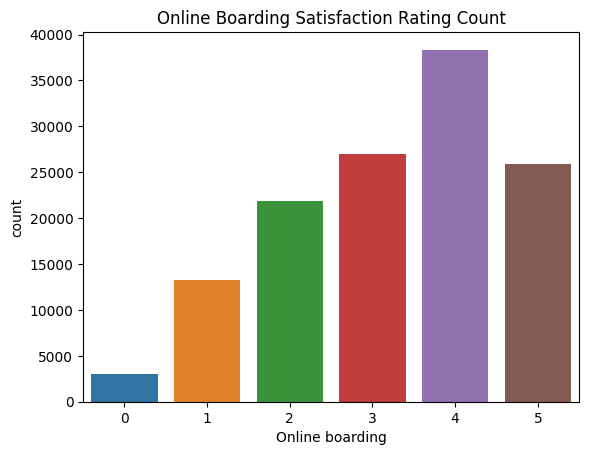

In [198]:
# count plot of classes in Online Boarding ratings 
sns.countplot(x = "Online boarding", data = df)
plt.title("Online Boarding Satisfaction Rating Count")
plt.show()

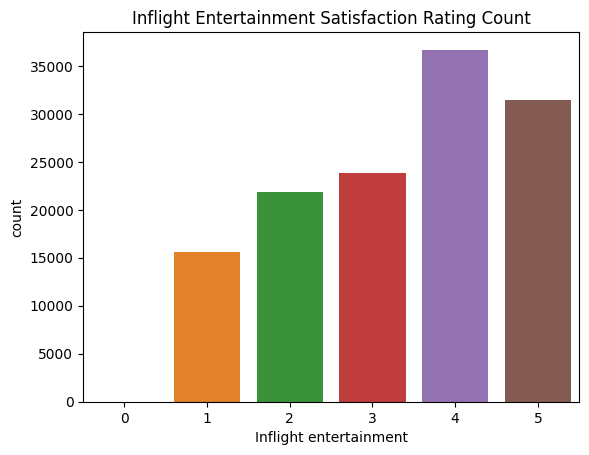

In [199]:
# count plot of classes in Inflight Entertainment ratings
sns.countplot(x = "Inflight entertainment", data = df)
plt.title("Inflight Entertainment Satisfaction Rating Count")
plt.show()

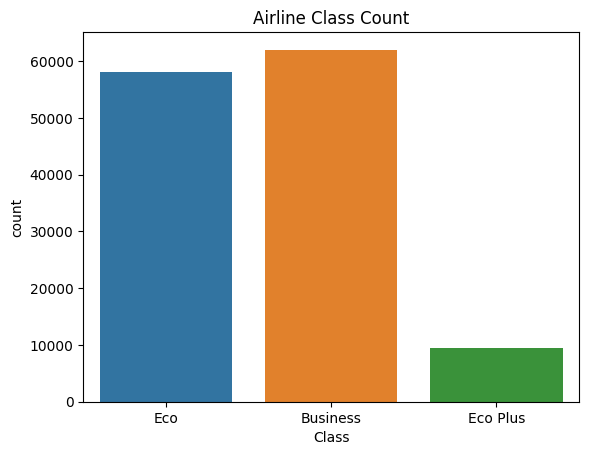

In [200]:
# Airline Class Count
sns.countplot(x = "Class", data = df)
plt.title("Airline Class Count")
plt.show()

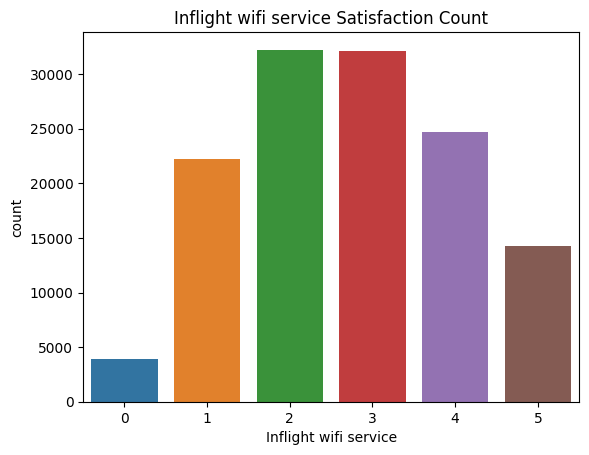

In [201]:
# Inflight wifi service satisfaction rating count 
sns.countplot(x = "Inflight wifi service", data = df)
plt.title("Inflight wifi service Satisfaction Count")
plt.show()

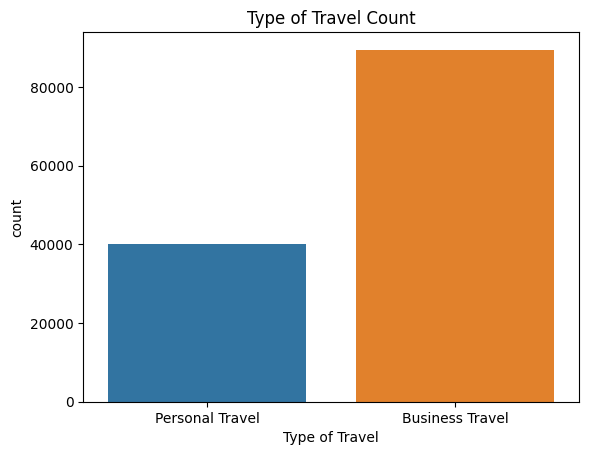

In [202]:
# Type of Travel Count
sns.countplot(x = "Type of Travel", data = df)
plt.title("Type of Travel Count")
plt.show()

## Modeling

In [203]:
# import machine learning tools 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

In [204]:
# column data types
df.dtypes

satisfaction_v2                       object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [205]:
# label encode our categorical columns 

le = LabelEncoder()

cat = ['satisfaction_v2','Gender','Customer Type','Class','Type of Travel']
for name in cat:
  df[name] = le.fit_transform(df[name])


In [206]:
# Now we split our predictors and target variable

# our predictors 
X = df.drop(['satisfaction_v2'], axis = 1)

# our target variable
y = df['satisfaction_v2']

In [207]:
# now we split our data sets into training and testing with a 80/20 split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0, stratify = y) 

In [208]:
# check our x_train and X_test shapes
X_train.shape, X_test.shape

((103589, 22), (25898, 22))

In [209]:
# instantiate our random forest model
rfc = RandomForestClassifier(random_state = 42)

# fit our model on our training sets
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [210]:
# accuracy of our model on the testing set
accuracy = rfc.score(X_test,y_test)
print(f"Random Forest accuracy on the Testing Set is: {accuracy}")

Random Forest accuracy on the Testing Set is: 0.9624295312379334


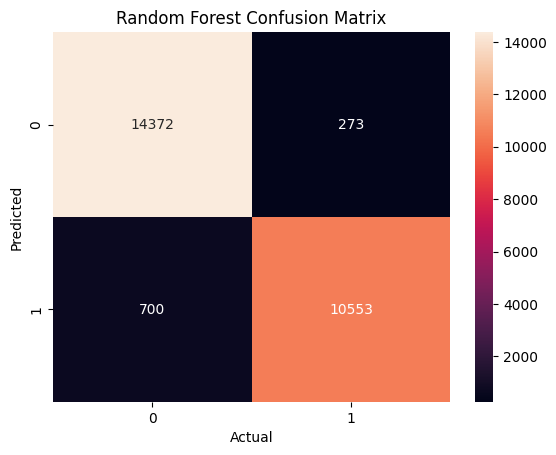

In [211]:
y_pred = rfc.predict(X_test)
forest_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(forest_matrix, annot=True, fmt="d")
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [212]:
# other metrics
f1_score = f1_score(y_test,y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)

print("Random Forest metrics")
print(f"Precision Score: {precision}")
print(f"F1 Score: {f1_score}")
print(f"Recall score: {recall}")

Random Forest metrics
Precision Score: 0.9747829299833733
F1 Score: 0.9559309751347433
Recall score: 0.9377943659468586


In [213]:
# create a feature importance data frame
dict1 = {'columns': rfc.feature_names_in_, 'importance': rfc.feature_importances_}
forest_importances = pd.DataFrame(dict1).sort_values('importance', ascending = False)
forest_importances

,columns,importance
11,Online boarding,0.170920
6,Inflight wifi service,0.138623
4,Class,0.108766
3,Type of Travel,0.090148
13,Inflight entertainment,0.060641
12,Seat comfort,0.043757
15,Leg room service,0.040036
8,Ease of Online booking,0.039080
1,Customer Type,0.036592
5,Flight Distance,0.033870


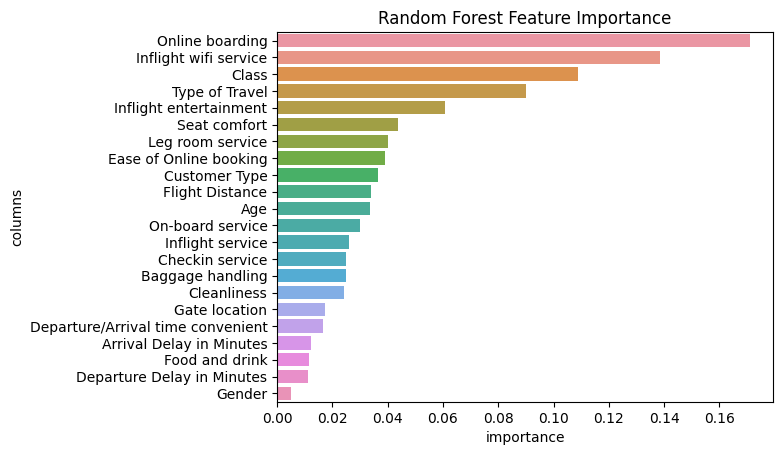

In [214]:
# plotting a horizontal bar chart on feature importance 
sns.barplot(data = forest_importances, y = 'columns', x = 'importance')
plt.title("Random Forest Feature Importance")
plt.show()

We will build a web app for our model so our users can toggle certain features to see how it affects a passengeer satisfaction level. As we can see we have too many attributes and so we can avoid making a complicated web app we will only choose the top 9, Which are Online Boarding, Inflight Wifi Service, Type of Travel, Class, Inflight Entertainment, Seat comfort, Ease of Online Booking, Leg Room Service, and Customer Type. We will see how only choosing these features impacts the accuracy of our model although them being the most influential to satisfaction levels. 

In [215]:
# creating data frame with the top 8 predictors
columns = ['Online boarding', 'Inflight wifi service', 'Type of Travel', 'Class', 'Inflight entertainment',
            'Seat comfort', 'Ease of Online booking', 'Leg room service', 'Customer Type', 'satisfaction_v2']

df_new = airline[columns]

In [216]:
# column data types
df_new.dtypes

Online boarding            int64
Inflight wifi service      int64
Type of Travel            object
Class                     object
Inflight entertainment     int64
Seat comfort               int64
Ease of Online booking     int64
Leg room service           int64
Customer Type             object
satisfaction_v2           object
dtype: object

In [217]:
# print the unique values for our categorical values
print(f"satisfaction order is: {df_new['satisfaction_v2'].unique()}")
print(f"Type  of Travel order is: {df_new['Type of Travel'].unique()}")
print(f"Class order is: {df_new['Class'].unique()}")
print(f"Customer Type order is: {df_new['Customer Type'].unique()}")


satisfaction order is: ['satisfied' 'neutral or dissatisfied']
Type  of Travel order is: ['Personal Travel' 'Business Travel']
Class order is: ['Eco' 'Business' 'Eco Plus']
Customer Type order is: ['Disloyal Customer' 'Loyal Customer']


The above cell is important after we label encode our categorical variables we know what order the labeling was. 

In [218]:
# label encode our categorical variables again
cat = ['satisfaction_v2','Type of Travel', 'Class', 'Customer Type']

for ct in cat:
  df_new = df_new.copy()
  df_new[ct] = le.fit_transform(df_new[ct])

In [219]:
# print the labeling for our categorical variables
print(f"satisfaction order is: {df_new['satisfaction_v2'].unique()}")
print(f"Type  of Travel order is: {df_new['Type of Travel'].unique()}")
print(f"Class order is: {df_new['Class'].unique()}")
print(f"Customer Type order is: {df_new['Customer Type'].unique()}")


satisfaction order is: [1 0]
Type  of Travel order is: [1 0]
Class order is: [1 0 2]
Customer Type order is: [0 1]


In [220]:
df_new.dtypes

Online boarding           int64
Inflight wifi service     int64
Type of Travel            int32
Class                     int32
Inflight entertainment    int64
Seat comfort              int64
Ease of Online booking    int64
Leg room service          int64
Customer Type             int32
satisfaction_v2           int32
dtype: object

In [221]:
# predictors 
X = df_new.drop(['satisfaction_v2'], axis = 1)

# target
y = df_new['satisfaction_v2']

In [222]:
# first 5 observations
df_new.head()

,Online boarding,Inflight wifi service,Type of Travel,Class,Inflight entertainment,Seat comfort,Ease of Online booking,Leg room service,Customer Type,satisfaction_v2
0,0,0,1,1,3,3,0,5,0,1
1,1,0,1,1,2,3,1,1,0,1
2,0,0,1,1,3,3,0,5,0,1
3,0,0,1,1,4,4,0,4,0,1
4,5,0,1,1,3,3,0,4,0,1


## New Random Forest Model

In [223]:
# train test split for our training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0, stratify = y) 

In [224]:
# instantiate our model
forest = RandomForestClassifier(random_state = 42)

# fit our model
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [225]:
# model accuracy with top 9 predictors 
accuracy = forest.score(X_test,y_test)
print(f"Random Forest accuracy on the Testing Set is: {accuracy}")

Random Forest accuracy on the Testing Set is: 0.9446412072682476


The accuracy of our Random Forest model when only using the top 9 important features returned an accuracy of 94% on unseen data (testing set). Implying our model is a fairly accurate model despite dropping a certain amount of features. We can probably get away and drop more features but I will leave it using the top 8 features. 

# Save our Model as a Pickle file

In [226]:
# import pickle library
import pickle

In [227]:
# our file name to save our model with 
# file_name = 'forest_model.sav'

# # save our model 
# pickle.dump(forest,open(file_name,"wb"))

In [228]:
# file_name = "label_encoder.sav"

# pickle.dump(le,open(file_name,"wb"))

In [229]:
example = X_test.sample(1)
print(example)

        Online boarding  Inflight wifi service  Type of Travel  Class  \
113052                5                      5               0      0   

        Inflight entertainment  Seat comfort  Ease of Online booking  \
113052                       4             5                       2   

        Leg room service  Customer Type  
113052                 5              1  


In [230]:
forest.predict(example)

array([1])

In [231]:
airline.iloc[example.index][['Customer Type','Type of Travel','Class','Online boarding', 
                            'Inflight wifi service', 'Inflight entertainment',
            'Seat comfort', 'Ease of Online booking', 'Leg room service', 'satisfaction_v2']].T

,113052
Customer Type,Loyal Customer
Type of Travel,Business Travel
Class,Business
Online boarding,5
Inflight wifi service,5
Inflight entertainment,4
Seat comfort,5
Ease of Online booking,2
Leg room service,5
satisfaction_v2,satisfied
